<a href="https://colab.research.google.com/github/Lucky-Millare/CSST106-CS4B/blob/main/Exercise%202/4B_MILLARE_EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uninstall existing OpenCV packages
!pip uninstall -y opencv-python opencv-contrib-python opencv-python-headless

# Install system dependencies
!apt-get update
!apt-get install -y build-essential cmake git pkg-config libjpeg-dev libtiff5-dev \
    libjasper-dev libpng-dev libavcodec-dev libavformat-dev libswscale-dev \
    libv4l-dev libxvidcore-dev libx264-dev libgtk-3-dev libatlas-base-dev gfortran \
    python3-dev

# Clone OpenCV and OpenCV contrib
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

# Create a build directory
!mkdir -p opencv/build
%cd opencv/build

# Configure the build with non-free modules
!cmake -DOPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules -DOPENCV_ENABLE_NONFREE=ON -D CMAKE_BUILD_TYPE=RELEASE -D CMAKE_INSTALL_PREFIX=/usr/local ..

# Build OpenCV (this may take some time)
!make -j4

# Install the built OpenCV
!make install

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.s

# **Sift Feature Extraction**

**Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


1. Load Image and Convert to Grayscale

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

2. Initialize Sift Detector

In [ ]:
sift = cv2.SIFT_create()

3. Detect and Draw Keypoints

In [ ]:
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

4. Display the Image

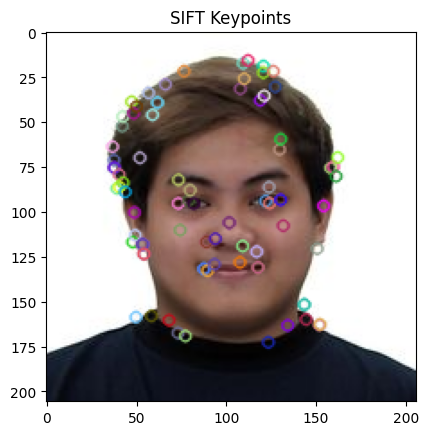

In [ ]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

# **SURF Feature Etraction**

1. Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

2. Initialize Surf Detector

In [ ]:
surf = cv2.xfeatures2d.SURF_create()

3. Detect and Draw Keypoints

In [ ]:
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

4. Display the Image

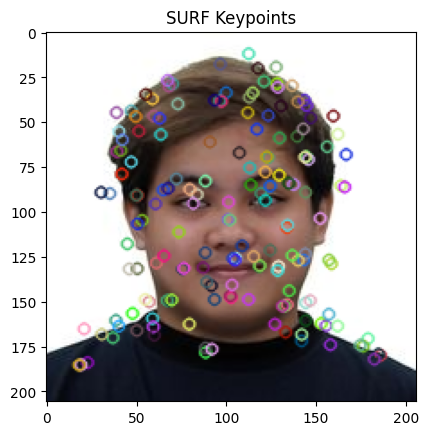

In [ ]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

# **ORB Feature Extraction**

Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Initialize Orb

In [ ]:
orb = cv2.ORB_create()

Keypoints and Descriptors

In [ ]:
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

Display the Image

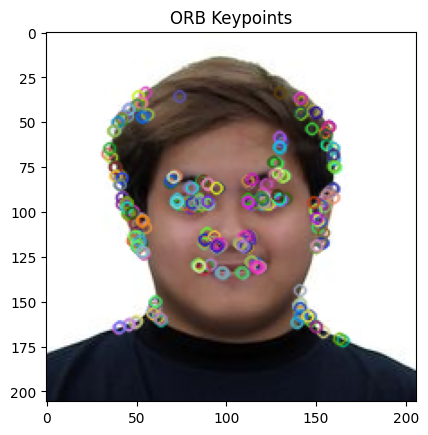

In [ ]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

# **Feature Matching using SIFT**

Load two Images

In [ ]:
image1_path = '/content/drive/MyDrive/image.jpeg'
image1 = cv2.imread(image1_path)
image2_path = '/content/drive/MyDrive/image.jpeg'
image2 = cv2.imread(image2_path)

Initialize SIFT detector

In [ ]:
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

Initialize the matcher

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck= True)


Match Descriptor

In [ ]:
matches = bf.match(descriptors1, descriptors2)

Sort Matches by Distance

In [ ]:
matches = sorted(matches, key=lambda x: x.distance)

Draw Matches

In [ ]:
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

Display the Image

<function matplotlib.pyplot.show(close=None, block=None)>

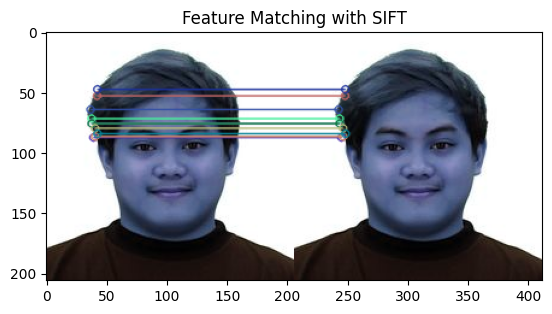

In [ ]:
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show

# **Real-World Applications (Image Stitching using Homography)**

Load two Image

In [ ]:
image1_path = '/content/drive/MyDrive/image.jpeg'
image1 = cv2.imread(image1_path)
image2_path = '/content/drive/MyDrive/second.jpg'
image2 = cv2.imread(image2_path)

Convert to grayscale

In [ ]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB Detector, Keypoint and Descriptors

In [ ]:
orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

Matching features using BFMatcher

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

Apply Ratio Test

In [ ]:
# Draw the matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [ ]:
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find the homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

In [ ]:
# Get the dimensions of the first image
h, w = image1.shape[:2]

# Warp image2 to align with image1
aligned_image = cv2.warpPerspective(image2, H, (w, h))

### Display the Output

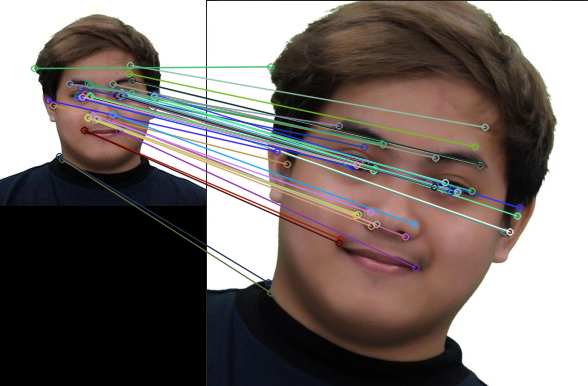

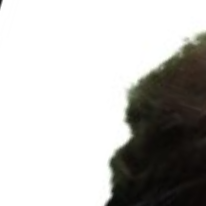

In [ ]:
# Show the matched image
cv2_imshow(matched_image)

# Show the aligned image
cv2_imshow(aligned_image)

# **Combining SIFT and ORB**

Load Image

In [ ]:
image1_path = '/content/drive/MyDrive/image.jpeg'
image1 = cv2.imread(image1_path)
image2_path = '/content/drive/MyDrive/image.jpeg'
image2 = cv2.imread(image2_path)

SIFT and ORB DETECTOR

In [ ]:
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

keypoints1_sift, descriptors1_sift = orb.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = orb.detectAndCompute(image2, None)

keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

Match sift and orb descriptor

In [ ]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Combine matches
combined_matches = matches_sift + matches_orb
combined_matches = sorted(combined_matches, key=lambda x: x.distance)

# Draw combined matches
matched_image = cv2.drawMatches(
    image1, keypoints1_sift + keypoints1_orb,
    image2, keypoints2_sift + keypoints2_orb,
    combined_matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

Display combine result

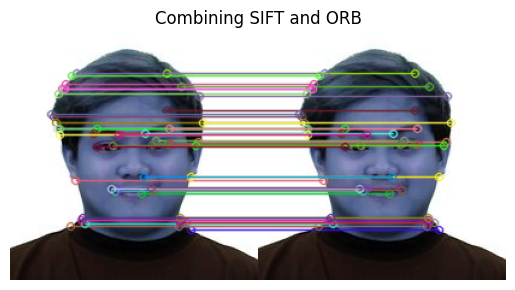

In [ ]:
plt.imshow(matched_image)
plt.title('Combining SIFT and ORB')
plt.axis('off')
plt.show()